# **Spatio Temporal Crime Classification Project**

**CS5803 :** Natural Language Processing 


---

# Submitted by:

***Tahir Ahmed(CS20MTECH14007)***

***Utkarsh Surwade(AI20MTECH11004)***

***Vaibhav Gaydhane(AI20MTECH11002)***


---


# Project Description
*Through this project we aim to achieve the task of spatio-temporal analysis of crime incidents, through which we would be able to predict the occurrences of different crimes given the spatial features such as address, location coordinates and date and time of the incidents. We use several classification methods and approaches to achieve this task, by training the classifier using the input features such as address, location coordinates, date and time, and the target feature being the category of crime that is to be predicted. We then compare the different classifiers with respect to a set of metrics such as accuracy, precision etc.* 




# **Dataset Vizualization /EDA of the Dataset**
Initially the orginal dataset is visualized across diferent parameters and various plots, figures and information is analysed.

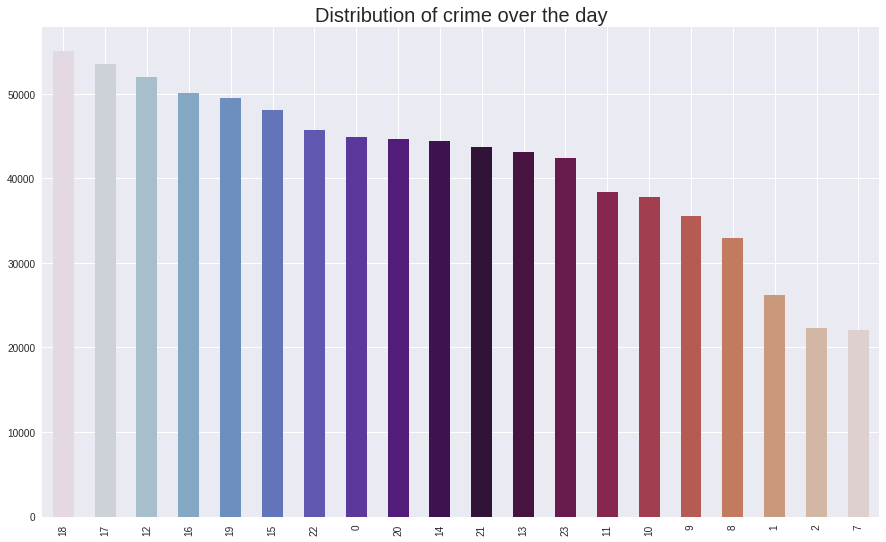

In [ ]:
#Performing Visualizations and EDA of the dataset
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/NLP Project/Preprocessd_CrimeDataset.csv")
'''
plt.style.use('seaborn')            


data['DayofWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()
'''

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Hours'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the Hours of a day', fontsize = 20)
plt.show()

# **Dataset Preprocessing** 
The following code is used in data preprocessing stage for all intital dataset preprocessing, aggreagated dataset and also the test dataset pre-processing. 

In [ ]:
#Pre-processing the data set to desired data
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import csv
import pickle as pkl
import re

lemmatizer = WordNetLemmatizer() #Lemmatizer to lemmatize words to root forms

file = open("Category_data",'wb')   # Category Data Stored in this file

punctuations = ['!',',','@','#','$','%','^','&','*','(',')','.','[',']','{','}',';',':','"','/','<','>','?','\\','|']

stopWords = set(stopwords.words('english'))

data = pd.read_csv("train.csv")           # Original Dataset
#data = pd.read_csv("test.csv")          #Used in test dataset preprocessing

data.dropna()

data.drop_duplicates(keep = 'first', inplace = True)

print(data.duplicated().sum())

data = data.drop(['Descript','Resolution','Address'],axis=1)

#data = data.drop(['Id'],axis=1)     #Used in test dataset preprocessing

category = data['Category'].unique()                                   #Commented out in test dataset preprocessing

date = data['Dates'].values

X = data['X'].values

Y = data['Y'].values

week = data['DayOfWeek'].values

pdistrict = data['PdDistrict'].values

cat_dict = {}
pdict = {}

week_dict = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}


#Creating a dictionary for categories
i = 0
for cat in category:
    cat_dict[i] = cat
    i = i+1

i=0
for pdist in data['PdDistrict'].unique():
    pdict[pdist] = i
    i = i+1

pkl.dump(cat_dict,file) #Category Data saved to file

file.close()

'''
Used in generating aggregated dataset

v =['VANDALISM','ROBBERY','ASSAULT','WEAPON LAWS','BURGLARY','DRUG/NARCOTIC','SEX OFFENSES FORCIBLE','PROSTITUTION','DISORDERLY CONDUCT','ARSON','FAMILY OFFENSES','SUICIDE','EXTORTION','TREA','PORNOGRAPHY/OBSCENE MAT']
nv = ['SUSPICIOUS OCC','DRUNKENNESS','FORGERY/COUNTERFEITING', 'STOLEN PROPERTY','SECONDARY CODES','TRESPASS','MISSING PERSON','FRAUD','KIDNAPPING','RUNAWAY','DRIVING UNDER THE INFLUENCE','LIQUOR LAWS','EMBEZZLEMENT','LOITERING','SEX OFFENSES NON FORCIBLE','GAMBLING','RECOVERED VEHICLE','BRIBERY','WARRANTS', 'OTHER OFFENSES','LARCENY/THEFT','VEHICLE THEFT','NON-CRIMINAL'] 
'''
cat = data['Category'].values                    #Commented out in test data preprocessing

i = 0

all_data = [["Date","Month","Year","Hours","Minutes","DayofWeek","PDistrict","X","Y","Category"]]    #For Coloumn headers in csv (Initial Preprocessed ad aggregated)
#all_data = [["Date","Month","Year","Hours","Minutes","DayofWeek","PDistrict","X","Y"]]      #For Coloumn headers in csv Test preprocessed


with open("Preprocessed_CrimeDataset.csv",'w',newline='') as file:                      #For Initial preprocessed dataset
#with open("Aggregated_CrimeDataset.csv",'w',newline='') as file:                       #For aggregated crime dataset
#with open("Preprocessed_test.csv",'w',newline='') as file:                             #For preprocessed test dataset
    
    for add in range(0,len(data)):
        csv_file = csv.writer(file)
        dates = re.split(" ",date[i])
        date_ = re.split("-",dates[0])
        year__ = date_[0]
        month = date_[1]
        date__ = date_[2]

        time = re.split(":",dates[1])
        hrs = time[0]
        minutes = time[1]

        dow = week_dict[week[i]]

        pdistric = pdict[pdistrict[i]]

        x = X[i]
        y= Y[i]

        
        for key,value in cat_dict.items():            #Commented out during test dataset preprcoessing
            if value == cat[i]:
                break
            '''                                     #Used in generating aggregated dataset
                k = key
                if value in v:
                    key = 0
                    break
                else:
                    key = 1
                    break
             '''
        
        row_data = [date__,month,year__,hrs,minutes,dow,pdistric,address_,x,y,key]               #For Intitial and aggregated datasets
        #row_data = [date__,month,year__,hrs,minutes,dow,pdistric,address_,x,y]                  For test dataset preprocessing     
        all_data.append(row_data)
        
    csv_file.writerows(all_data)

# **Initial Training and Prediction**
The Intial training happens with the preprocessed dataset. All classifiers are trained and the accuracy scores are calculated.
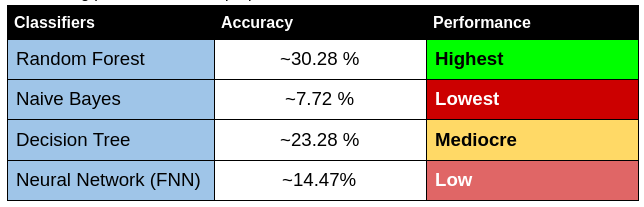

        Date  Month  Year  Hours  ...  DayofWeek  PDistrict           X          Y
0         13      5  2015     23  ...          3          0 -122.425892  37.774599
1         13      5  2015     23  ...          3          0 -122.425892  37.774599
2         13      5  2015     23  ...          3          0 -122.424363  37.800414
3         13      5  2015     23  ...          3          0 -122.426995  37.800873
4         13      5  2015     23  ...          3          1 -122.438738  37.771541
...      ...    ...   ...    ...  ...        ...        ...         ...        ...
878044     6      1  2003      0  ...          1          6 -122.459033  37.714056
878045     6      1  2003      0  ...          1          2 -122.447363  37.731948
878046     6      1  2003      0  ...          1          9 -122.403390  37.780266
878047     6      1  2003      0  ...          1          9 -122.390531  37.780607
878048     6      1  2003      0  ...          1          3 -122.394926  37.738212

[87

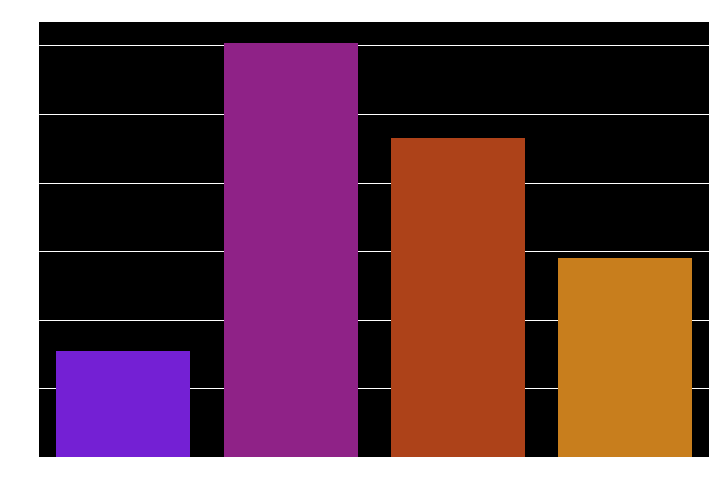

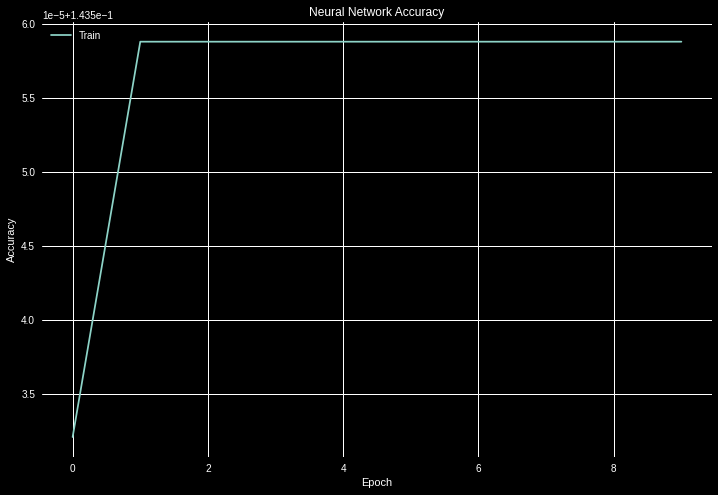

In [ ]:
'''
In This Project We Try To Run the Data Set across a set of classifiers, which include the basline classfiers such as
SVM, Random Forest , Naive Bayes and deep learning classifer using Neural Network . The results are then promted 
and analysed 
'''

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas as pd

from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

class NaiveBayes_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = GaussianNB()
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)
    pkl.dump(self.model,open('/content/drive/MyDrive/NLP Project/Models/nb_model','wb'))

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test) 

    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)

class RandomForest_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = RandomForestClassifier(n_estimators = 20)
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test)
    
    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)

  
class DecisionTree_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = DecisionTreeClassifier(criterion='entropy', random_state=0)
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)
    pkl.dump(self.model,open('/content/drive/MyDrive/NLP Project/Models/dt_model','wb'))

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test)
    
    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)


class NeuralNet:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    
    self.model=Sequential()
    self.model.add(Dense(128,input_shape=(X.shape[1],),activation='relu')) 
    self.model.add(Dropout(0.3))
    self.model.add(Dense(64,activation='relu'))
    #self.model.add(Dense(1,activation='softmax'))
    self.model.add(Dense(1,activation='sigmoid'))                   #For Binary Aggregate Dataset Classification
    self.model.summary()
    
    self.history = {}

  def train(self):
    self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
    self.history = self.model.fit(self.X, self.y, epochs = 10, batch_size =32, validation_split = 0.2)
    self.model.save('/content/drive/MyDrive/NLP Project/Models/nn_model.h5')
    
  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict_classes(X_test)
    self.accuracy = accuracy_score(y_pred,y_test)

data = pd.read_csv("/content/drive/MyDrive/NLP Project/Preprocessd_CrimeDataset.csv",error_bad_lines=False)

X = data.iloc[:,:9]


print(X)

y = data['Category'].values

print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

#Now Build Classifiers 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

nb = NaiveBayes_Classifier(X_train,y_train)

#hyperparameter tuning
# No. of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# No. of features to consider at every split
# max_features = ['auto', 'sqrt']
# Max no. of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Min no. of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# Min no. of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
# random_grid = {'n_estimators': n_estimators,
              #  'criterion': gini, #tried entropy
              #  'max_features': max_features,
              #  'max_depth': max_depth,
              #  'min_samples_split': min_samples_split,
              #  'min_samples_leaf': min_samples_leaf,
              #  'bootstrap': bootstrap}

# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=4, n_jobs = -1)
# rf_random.fit(X_train, y_train)

# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

rf = RandomForest_Classifier(X_train,y_train)
dt = DecisionTree_Classifier(X_train,y_train)

nn = NeuralNet(X_train,y_train)

nb.train()
rf.train()
dt.train()

nn.train()

nb.getParameters(X_test,y_test)
rf.getParameters(X_test,y_test)
dt.getParameters(X_test,y_test)

nn.getParameters(X_test,y_test)


print("-----------CLASSIFICATION REPORTS AND ACCURACY---------\n")
print("Classifier\t\t\t\tAccuracy\t\t\t\tPrecision\t\t\t\tF1_Score")

print("Naive Bayes\t\t\t\t",nb.accuracy*100)
print("RandomForest\t\t\t\t",rf.accuracy*100)
print("Decision Tree\t\t\t\t",dt.accuracy*100)
print("Neural Network\t\t\t\t",nn.accuracy*100)

plt.figure(figsize=(12,8))
plt.style.use('dark_background')

plt.title('Preliminary Accuracies Achieved')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

sns.barplot(['Naive Bayes','Random Forest','Decision Tree','Neural Network'], [nb.accuracy*100,rf.accuracy*100,dt.accuracy*100,nn.accuracy*100],palette = 'gnuplot')

plt.show()

plt.figure(figsize=(12,8))
plt.title('Neural Network Accuracy')
plt.plot(nn.history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

                                                                                
                                                                                   

# **Training and Prediction over the aggregated dataset**
This section focuses on training the classifiers on the optimized and balanced dataset of aggregated crime classes. The prime target features are (Violent and Nonviolent Crimes) The accuracy improves by a huge margin through this approach.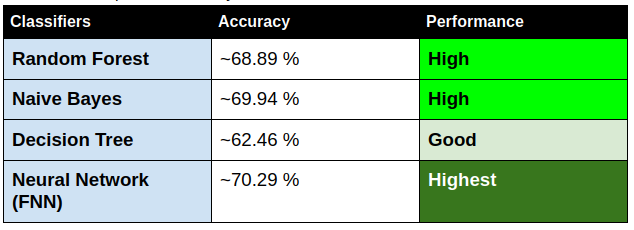


[[4.00000000e-01 3.63636364e-01 1.00000000e+00 ... 0.00000000e+00
  4.35779480e-02 1.27590107e-03]
 [4.00000000e-01 3.63636364e-01 1.00000000e+00 ... 0.00000000e+00
  4.35779480e-02 1.27590107e-03]
 [4.00000000e-01 3.63636364e-01 1.00000000e+00 ... 0.00000000e+00
  4.43370967e-02 1.76958398e-03]
 ...
 [1.66666667e-01 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  5.47523820e-02 1.38427270e-03]
 [1.66666667e-01 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  6.11383037e-02 1.39080336e-03]
 [1.66666667e-01 0.00000000e+00 0.00000000e+00 ... 3.33333333e-01
  5.89560305e-02 5.80059062e-04]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]
(702439, 9) (702439, 1)
(175610, 9) (175610, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               1280      
_________________________________________________________________
dropout_11 (Dropout)   

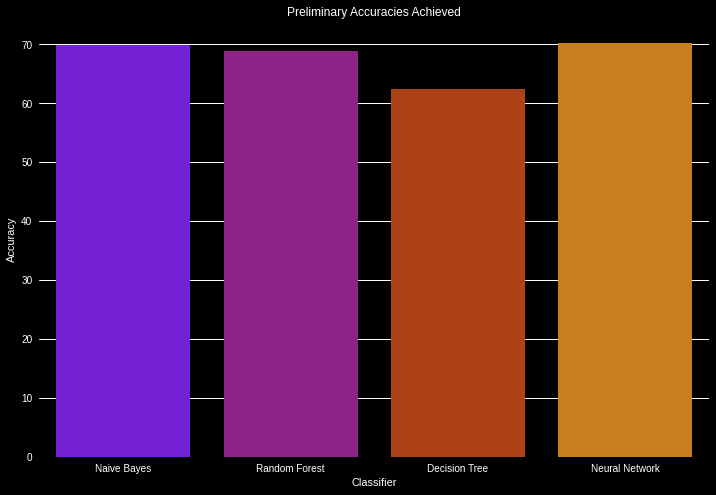

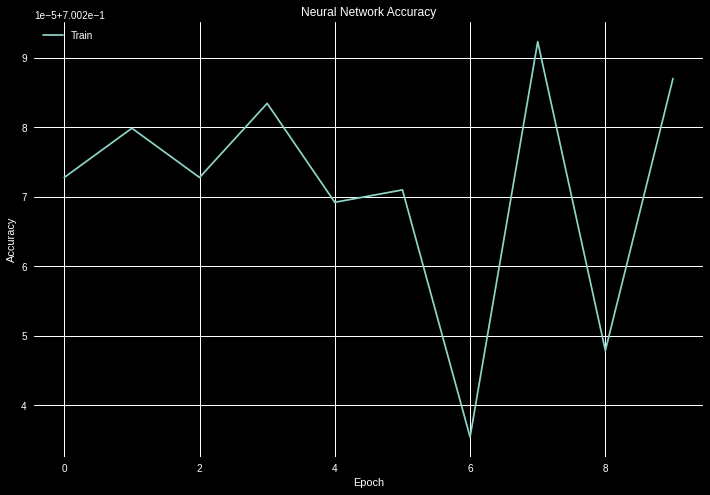

In [ ]:
#Predictions over the aggregated dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas as pd

import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

class NaiveBayes_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = GaussianNB()
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)
    pkl.dump(self.model,open('/content/drive/MyDrive/NLP Project/Models/nb_model','wb'))

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test) 

    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)

class RandomForest_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = RandomForestClassifier(n_estimators = 20)
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test)
    
    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)

  
class DecisionTree_Classifier:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    self.model = DecisionTreeClassifier(criterion='entropy', random_state=0)
    self.accuracy = 0.0
    self.precision = 0.0
    self.f1_score = 0.0
  
  def train(self):
    self.model.fit(self.X,self.y)
    pkl.dump(self.model,open('/content/drive/MyDrive/NLP Project/Models/dt_model','wb'))

  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict(X_test)
    
    self.precision = precision_score(y_pred,y_test,average='micro')
    self.f1_score = f1_score(y_pred,y_test,average='micro')
    self.accuracy = accuracy_score(y_pred,y_test)


class NeuralNet:
  def __init__(self,X,y):
    self.X = X
    self.y = y
    
    self.model=Sequential()
    self.model.add(Dense(128,input_shape=(X.shape[1],),activation='relu')) 
    self.model.add(Dropout(0.3))
    self.model.add(Dense(64,activation='relu'))
    #self.model.add(Dense(1,activation='softmax'))
    self.model.add(Dense(1,activation='sigmoid'))                   #For Binary Aggregate Dataset Classification
    self.model.summary()
    
    self.history = {}

  def train(self):
    keras.optimizers.Adam(learning_rate=1e-06)
    self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
    self.history = self.model.fit(self.X, self.y, epochs = 10, batch_size =32, validation_split = 0.2)
    self.model.save('/content/drive/MyDrive/NLP Project/Models/nn_model.h5')
    
  def getParameters(self,X_test,y_test):
    y_pred = self.model.predict_classes(X_test)
    self.accuracy = accuracy_score(y_pred,y_test)

data = pd.read_csv("/content/drive/MyDrive/NLP Project/Aggregated_CrimeDataset2.csv",error_bad_lines=False)

X = data.iloc[:,:9]

scaler = MinMaxScaler()

model = scaler.fit(X)

scaled_data = model.transform(X)

X = scaled_data

print(X)

y = data['Category'].values

y = y.reshape(-1,1)

model = scaler.fit(y)

y = model.transform(y)

print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

#Now Build Classifiers 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

nb = NaiveBayes_Classifier(X_train,y_train)
rf = RandomForest_Classifier(X_train,y_train)
dt = DecisionTree_Classifier(X_train,y_train)

nn = NeuralNet(X_train,y_train)

nb.train()
rf.train()
dt.train()

nn.train()

nb.getParameters(X_test,y_test)
rf.getParameters(X_test,y_test)
dt.getParameters(X_test,y_test)

nn.getParameters(X_test,y_test)


print("-----------CLASSIFICATION REPORTS AND ACCURACY---------\n")
print("Classifier\t\t\t\tAccuracy\t\t\t\tPrecision\t\t\t\tF1_Score")

print("Naive Bayes\t\t\t\t",nb.accuracy*100)
print("RandomForest\t\t\t\t",rf.accuracy*100)
print("Decision Tree\t\t\t\t",dt.accuracy*100)
print("Neural Network\t\t\t\t",nn.accuracy*100)

plt.figure(figsize=(12,8))
plt.style.use('dark_background')

plt.title('Preliminary Accuracies Achieved')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

sns.barplot(['Naive Bayes','Random Forest','Decision Tree','Neural Network'], [nb.accuracy*100,rf.accuracy*100,dt.accuracy*100,nn.accuracy*100],palette = 'gnuplot')

plt.show()

plt.figure(figsize=(12,8))
plt.title('Neural Network Accuracy')
plt.plot(nn.history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


# **Making The Final Predictions Through The Trained Model**

We now load the trained model with the highest accuracy and make predictions on the test dataset that is completely unseen till now. The test dataset is also preprocessed.

In [ ]:
'''
Running Predictions on the Best Model i.e the NN (Neural Network Model). Here we load the saved model that was trained earlier in the 
in the above section. The Model is saved on the drive folder.
'''
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from keras.models import load_model
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred_dict = {0 : "Violent", 1:"Non_Violent"}
data = pd.read_csv("/content/drive/MyDrive/NLP Project/Preprocessed_test.csv")                 

X = data                                                                        

nn = load_model('/content/drive/MyDrive/NLP Project/Models/nn_model.h5')    # Use the model trained earler with highest accuracy and again feed to another ensemble model to train and generate the final predictions

score = nn.evaluate(X_test, y_test, verbose = 1) 

print("Model Loss :" ,score[0])
print("Model Accuracy",score[1])



False
5488/5488 [==============================] - 5s 841us/step - loss: 0.5979 - accuracy: 0.7030
Model Loss : 0.597938060760498
Model Accuracy 0.7029838562011719


# **Geospatial Visualization of the the Model Predictions**
The predictions generated by the trained models are plotted on the geographical map using the location co-ordinates to generate the predicted crime categories across the state. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from keras.models import load_model
import pickle as pkl
from folium.plugins import MarkerCluster

data_ = pd.read_csv("/content/drive/MyDrive/NLP Project/Preprocessed_test.csv")

X = data_

nn_model = load_model('/content/drive/MyDrive/NLP Project/Models/nn_model.h5')
nb_model = pkl.load(open('/content/drive/MyDrive/NLP Project/Models/nb_model','rb'))
dt_model = pkl.load(open('/content/drive/MyDrive/NLP Project/Models/dt_model','rb'))

scores = nn_model.predict(X)

predictions = nn_model.predict_classes(X)

data_["Predicted"] = predictions

cat= 1

new = data_[data_['Predicted'] == cat]

m = folium.Map(
    location=[37, 122],
    tiles='Cartodb Positron',
    zoom_start=13
)

marker_cluster = MarkerCluster(
    name='Violent Crime Locations',
    overlay=False,
    control=False,
    icon_create_function=None
)
for k in range(500):
    location = new.Y.values[k], new.X.values[k]
    marker = folium.Marker(location=location,icon=folium.Icon(color='green')).add_to(m)

folium.LayerControl().add_to(m)       

m.save("/content/drive/MyDrive/NLP Project/NonViolentCrimes_NN.html")            

m



# **Geo-Spatial Map Plots For Predictions**
The following are a few map plots for the predictions as made above.

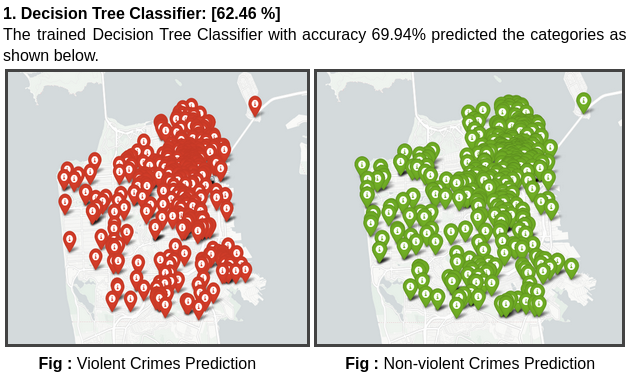

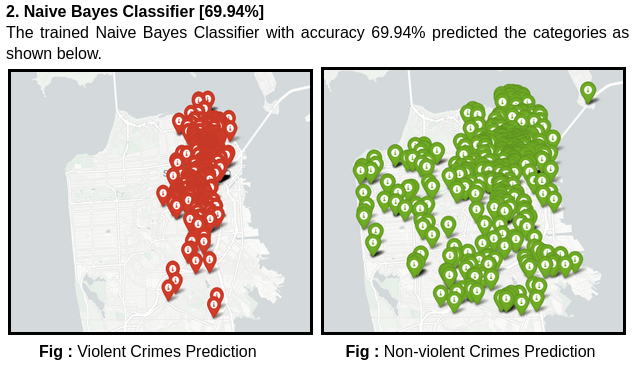

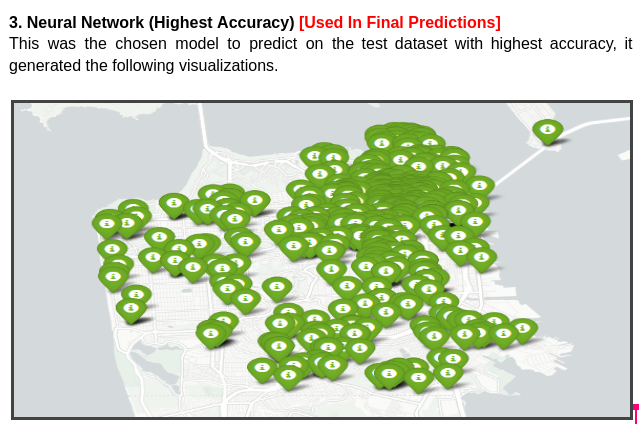


# References

1. [Forensic data analysis - Wikipedia](https://en.wikipedia.org/wiki/Forensic_data_analysis#:~:text=Forensic%20Data%20Analysis%20%28FDA%29%20is%20a%20branch%20of,underlying%20databases%20is%20referred%20to%20as%20structured%20data.)

2. [SF crime classification | Kaggle](https://www.kaggle.com/mohitsital/sf-crime-classification)

3. [***Crime Prediction and Classification in San Francisco City***, Addarsh Chandrasekar, Abhilash Sunder Raj and Poorna Kumar](http://cs229.stanford.edu/proj2015/228_report.pdf)

4. [***Spatiotemporal Analysis of Web News Archives for Crime Prediction*** Areeba Umair1, Muhammad Shahzad Sarfraz1, Muhammad Ahmad1,Usman Habib1, Muhammad Habib Ullah2and Manuel Mazzara](https://www.mdpi.com/2076-3417/10/22/8220/pdf)


